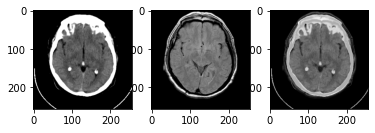

In [30]:
import cv2
from ImageFusion import ImageFusion
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


class FusionPCA(ImageFusion):
    """ Image fusion based PCA"""
    def __init__(self, imageNames):
        self._imageNames = imageNames
        self._images = []
        self._fusionImage = None

    def _load_images(self):
        for name in self._imageNames:
            self._images.append(np.array(Image.open(name), 'f'))
    def fusion(self):
        self._load_images()
        imageSize = self._images[0].size
        # Todo: for more than two images
        allImage = np.concatenate((self._images[0].reshape(1, imageSize), self._images[1].reshape(1, imageSize)), axis=0)
        covImage = np.cov(allImage)
        D, V = np.linalg.eig(covImage)
        if D[0] > D[1]:
            a = V[:,0] / V[:,0].sum()
        else:
            a = V[:,1] / V[:,1].sum()
        self._fusionImage = self._images[0]*a[0] + self._images[1]*a[1]
        return self._fusionImage
    def plot(self):
        plt.figure(0)
        plt.gray()
        plt.subplot(131)
        plt.imshow(self._images[0])
        plt.subplot(132)
        plt.imshow(self._images[1])
        plt.subplot(133)
        plt.imshow(self._fusionImage)
        plt.show()
if __name__ == '__main__':
    
    IMAGEPATH = "images/MRI-CT/"
    imLists = [IMAGEPATH+"ct.png",IMAGEPATH+"mr.png"]
    fu = FusionPCA(imLists)
    fu.fusion()
    fu.plot()
 
